Horse

In [1]:
import networkx as nx
import pulp as pl

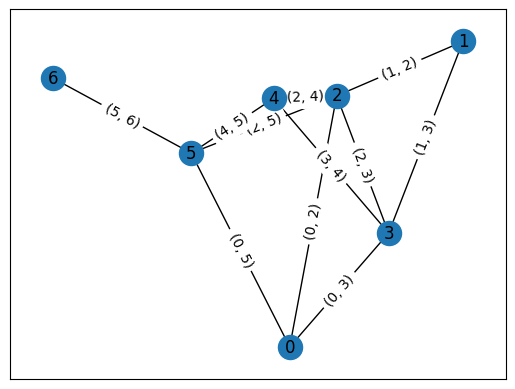

In [2]:
g = nx.graph_atlas(765)
V = g.nodes
edges = g.edges

s = 1
t = 6
k = 3

pos = nx.spring_layout(g, seed = 10)
edge_labels = {
    edge:str(edge) for edge in g.edges
}

nx.draw_networkx(g, pos = pos)
nx.draw_networkx_edge_labels(g, pos = pos, edge_labels = edge_labels, font_color = 'black');

In [3]:
model = pl.LpProblem("MaxSourceSide", pl.LpMaximize)
x = {v: pl.LpVariable(f"x_{v}", 0, 1, cat = "Binary") for v in V}
r = {v: pl.LpVariable(f"r_{v}", 0, 1, cat = "Binary") for v in V}

In [4]:
model += x[s] == 1
model += x[t] == 0
model += r[s] == 0
model += r[t] == 0

In [5]:
#budget
model += pl.lpSum(r[v] for v in V if v not in {s,t}) <= k

In [6]:
#edge constraints
for u, v in edges:
    model += x[u] - x[v] <= r[u] + r[v]
    model += x[v] - x[u] <= r[u] + r[v]

#objective
model += pl.lpSum(x[v] for v in V)

model.solve(pl.PULP_CBC_CMD(msg=True))

1

In [7]:
print(f"Nodes reachable from the source:\n{
        ', '.join([str(node) for node, val in x.items() if val.value() == 1])
    }"
)

print(f"Edges cut:\n{
        ', '.join([str(edge) for edge, val in r.items() if val.value() == 1])
    }"
)

Nodes reachable from the source:
0, 1, 2, 3, 4, 5
Edges cut:
5


In [8]:
[ ra.value() for key, ra in r.items()]

[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]

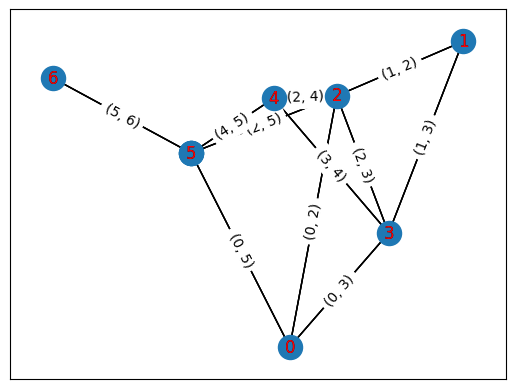

In [9]:
g = nx.graph_atlas(765)
V = g.nodes
edges = g.edges

s = 1
t = 6
k = 3

pos = nx.spring_layout(g, seed = 10)
edge_labels = {
    edge:str(edge) for edge in g.edges
}

# draw the graph with no labels on nodes or edges
nx.draw_networkx(g, pos = pos, with_labels = False, font_color = 'black');

#draw the node labels
nx.draw_networkx(g, pos = pos, nodelist = [5], font_color = 'black')

# draw the removed node label
nx.draw_networkx(g, pos = pos, nodelist = [5], font_color = 'red')

# label the edges
nx.draw_networkx_edge_labels(g, pos = pos, edge_labels = edge_labels, font_color = 'black');


---

## Construct the horse problem
[enclose.horse](http://enclose.horse)

Using matplotlib backend: module://matplotlib_inline.backend_inline


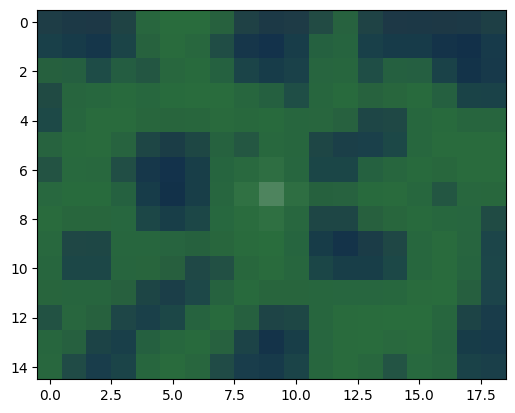

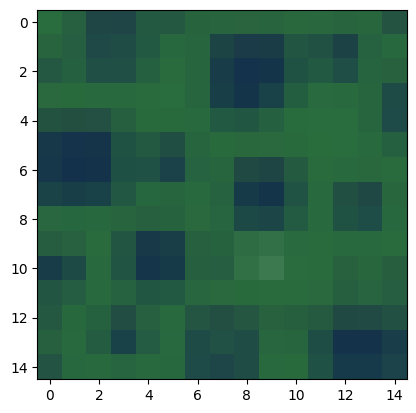

In [46]:
%matplotlib
import networkx as nx
import pulp as pl
import numpy as np
from skimage.io import imread, imsave
from skimage.transform import resize
from matplotlib.pyplot import imshow, subplots, show
import matplotlib.pyplot as plt
from os import path, listdir, getcwd, chdir
from matplotlib.animation import FuncAnimation

pix_folder = './pix/'
pixnames = listdir(pix_folder)

pix = [imread(path.join(pix_folder, pic)) for pic in pixnames]

divider = 17*3
scalepic = [
    resize(pic, (pic.shape[0]/divider, pic.shape[1]/divider))
    for pic in pix
]
imshow(scalepic[0], interpolation = 'none')
show();


imshow(scalepic[1]);

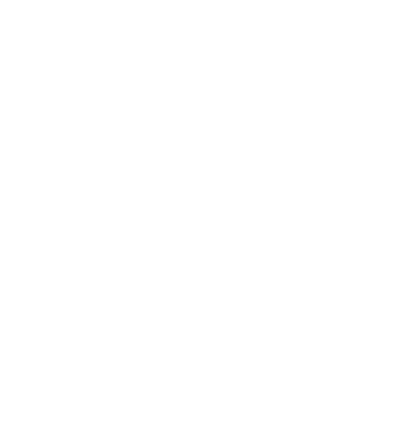

In [47]:
expic = pix[1]

frames = [
    resize(expic, (expic.shape[0]/divider, expic.shape[1]/divider))
    for divider in range(12,25)
]

fig, ax = subplots()
im = ax.imshow(frames[0], vmin=0, vmax=1.)

def update(i):
    ax.set_xlabel(f"frame {i}")
    im.set_data(frames[i])
    return im, ax

ani = FuncAnimation(
    fig,
    update,
    frames=len(frames),
    interval=100,
    blit = True
)

plt.show()

In [37]:
[ frame.shape for frame in frames]

[(64, 64, 4),
 (59, 59, 4),
 (55, 55, 4),
 (51, 51, 4),
 (48, 48, 4),
 (45, 45, 4),
 (43, 43, 4),
 (40, 40, 4),
 (38, 38, 4),
 (37, 37, 4),
 (35, 35, 4),
 (33, 33, 4),
 (32, 32, 4)]

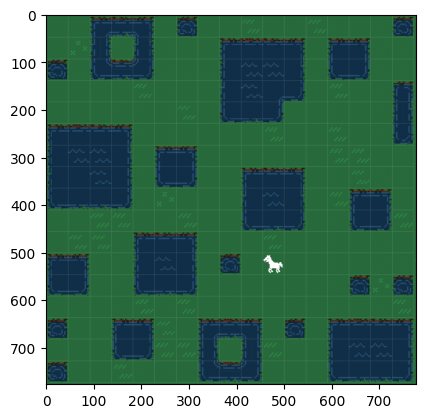

In [16]:
fig, ax = subplots()
im = ax.imshow(frames[0],  animated=True)

In [20]:
ax.imshow(frames[0])

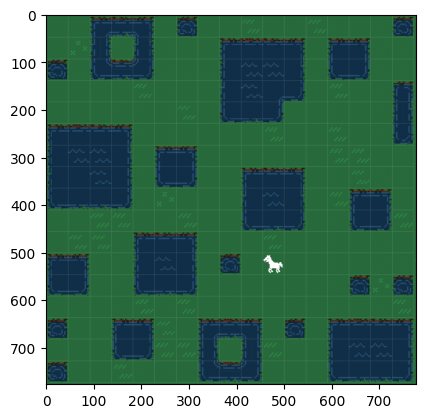

In [19]:
fig

In [21]:
_